<h1 style="color:rgb(0,120,170)">Assignment 5</h1>

<h2 style="color:rgb(208,90,80)">Topic: Factor Analysis</h2>
<h2 style="color:rgb(0,120,170)">Machine Learning: Unsupervised Techniques, SS 2019</h2>

<h3 style="color:rgb(0,120,170)">Deadline: see Moodle</h3>

Return this notebook with your code and answers.

# Exercise A: Programming and Data Analysis

In [1]:
import numpy as np
import scipy
import scipy.stats

# Own imports
import matplotlib.pyplot as plt

Consider the following parameters, i.e. the number of samples `nrSamples`, the number of features `nrFeatures`, and the number of hidden variables/factors/latent variables `nrHidden`. We randomly choose a factor loading matrix `U` and a noise covariance matrix `Psi`. Note that the latter is a diagonal matrix and can thus be efficiently implemented as a vector.

In [2]:
np.random.seed(1234567890)
nrSamples = 10000
nrFeatures = 30
nrHidden = 5
U = np.random.normal(size=[nrFeatures, nrHidden])
Psi = np.random.uniform(1.0, 3.0, size=[nrFeatures])
print(f'U = {U}\n')
print(f'Psi = {Psi}')

U = [[ 1.34016346  1.73759123  1.49898834 -0.22864333  2.031034  ]
 [ 2.17032495  1.59645265 -0.76945156  0.56605824 -0.11927018]
 [-0.1465108  -0.79890338  0.77183278 -0.82819136  1.32667483]
 [ 1.05986776  2.14408873 -1.43464512  2.28743654  0.42864858]
 [-1.27735774 -0.81239806  0.29888126 -0.83479401  0.57234671]
 [ 0.34436419  2.06583253  0.34092975 -1.06248478  1.04470276]
 [ 0.76049958  0.72027479  0.81431707 -0.26817228  0.86148846]
 [-0.4036122   0.57010427  1.35185359  0.80588592 -0.11784617]
 [ 0.06192517  1.56967617  0.09135511 -0.55761771 -0.80353874]
 [-1.70423671  0.76773378  1.28106105  0.64261379  1.21378137]
 [-0.05858236 -1.28087238  0.11330281  0.00876557 -2.15009066]
 [-0.52745637  0.1960846  -1.54752551  0.84530456  0.57418049]
 [-0.31176006  0.17788991 -0.54071305  0.37785798 -1.45473663]
 [-0.07598855  0.03690977 -0.41350682 -1.08373066  1.39172053]
 [ 1.41778778 -1.11864984  1.00605157 -1.24514983 -0.17587852]
 [ 0.5796579   0.1359769   0.21919628 -2.98217483 -

<h3 style="color:rgb(0,120,170)">Question 5.1 (10 Points):</h3>

Generate some toydata `X` with `nrSamples` and `nrFeatures` according to a centered Factor Analyis model, using the factor loading matrix `U` from above and `noise` according to the noise covariance matrix `Psi`.

<h3 style="color:rgb(208,90,80)">Answer 5.1:</h3>

In [3]:
I = np.identity(nrHidden)
print(I.shape)

# Y ~ N(0, I)
Y = np.random.multivariate_normal(np.zeros(nrHidden), I, size=nrSamples)
print(Y.shape)

# e ~ N(0, psi)
e = np.random.multivariate_normal(np.zeros(nrFeatures),
                                  np.diag(Psi),
                                  size=nrSamples)
print(e.shape)

# X = Uy + e
X = Y @ U.T + e
print(X.shape)

(5, 5)
(10000, 5)
(10000, 30)
(10000, 30)


<h3 style="color:rgb(0,120,170)">Question 5.2 (5 Points):</h3>

Now derive an expression for the covariance matrix `CMat` of the generated data. (Make sure to center the data (i.e. assume non-zero mean) for this calculation, since you might not know at this stage, that the data is generated with a mean of 0.)

<h3 style="color:rgb(208,90,80)">Answer 5.2:</h3>

In [4]:
def scale_CMat(mat):
    scaled = mat - mat.mean(axis=0)
    n = len(mat)
    return (scaled.T @ scaled) / n


C = scale_CMat(X)
print(C.shape)
print(C[0, :])

(30, 30)
[12.57218714  4.12468091  2.42199634  3.28097802 -1.19151224  6.76998798
  5.22731694  2.09211147  1.47851069  3.30131749 -6.38544186 -1.73418451
 -3.88121989  2.28627471  1.41837258  0.09843094 -0.04852499  0.52226284
 -3.2154409  -1.49359041  2.41796947 -3.18217264 -0.14077544 -0.76969219
  2.54950791 -3.72489481 -1.15463917  1.30065542  2.24660141 -0.3402228 ]


<h3 style="color:rgb(0,120,170)">Question 5.3 (10 Points):</h3>

Compute the moments (mean: `mu` and variance `sigma`) given by equations (1) of the exercise notes for the given parameters and settings.

<h3 style="color:rgb(208,90,80)">Answer 5.3:</h3>

In [5]:
def mu(U, Psi, x_i):
    return U.T @ np.linalg.inv(U @ U.T + Psi) @ x_i


# computationally expensive but stuck with original formula
def mu_all(U, Psi, X):
    return np.asarray([mu(U, Psi, x_i) for x_i in X])


def mu_all_fast(U, Psi, X):
    return X @ (U.T @ np.linalg.inv(U @ U.T + Psi)).T


def sigma(U, Psi):
    I = np.identity(U.shape[1])
    return I - U.T @ np.linalg.inv(U @ U.T + Psi) @ U


X_scaled = X - X.mean(axis=0)

# 1:1 formula from slides
# mus = mu_all(U, Psi, X_scaled)

mus = mu_all_fast(U, np.diag(Psi), X_scaled)
sigmas = sigma(U, np.diag(Psi))

print(f'shape(µ): {mus.shape}')
print(f'µ:\n{mus}\n')

print(f'shape(σ): {sigmas.shape}')
print(f'σ:\n{sigmas}')

shape(µ): (10000, 5)
µ:
[[-0.2085251  -0.46470825  0.40002031 -1.48806009  2.07557633]
 [ 0.64999743 -0.0269445  -1.02206611 -0.2407601   0.5804282 ]
 [-1.6864065  -0.23588198 -0.97322217 -0.29442394  0.67265929]
 ...
 [ 0.25525804 -1.02514046  1.26353014  1.11502866  0.03523008]
 [-0.61266769  0.19823081  1.52873752  2.58718839 -0.45543549]
 [-0.09650063 -1.32746906  0.81998553 -0.38471436  0.02844476]]

shape(σ): (5, 5)
σ:
[[ 0.06770432 -0.0162667   0.01927399  0.02486127 -0.00131667]
 [-0.0162667   0.06850146  0.00055655 -0.02449904 -0.01651997]
 [ 0.01927399  0.00055655  0.07869249  0.02772072 -0.01211671]
 [ 0.02486127 -0.02449904  0.02772072  0.07688728  0.01062434]
 [-0.00131667 -0.01651997 -0.01211671  0.01062434  0.065298  ]]


<h3 style="color:rgb(0,120,170)">Question 5.4 (15 Points + 10 Bonus Points):</h3>

The matrix inversion lemma (equation (2) of the exercise notes) is often helpful to get expressions that are faster to compute. Examples of these expressions are given by equations (3)-(5). These expressions are then further used for the equations in the M-Step of the EM algorithm.

Using, (3)-(5), compute $U_{part_0} = \frac{1}{n} \sum_{i=1}^n \mathbf{x}_i \mathbf{E}_{\mathbf{y}_i | \mathbf{x}_i}\! \left( \mathbf{y}_i^T \right)$ and $U_{part_1} = \frac{1}{n} \sum_{i=1}^n \mathbf{E}_{\mathbf{y}_i | \mathbf{x}_i}\! \left( \mathbf{y}_i \mathbf{y}_i^T \right)$.

*Hint*: When studying the lecture notes (not the exercise notes), consider that $\mathbf{U}$ is used for two different expressions (in the same formulas). So don't get confused, in the exercise notes, we use $\hat{\mathbf{U}} = \Psi^{-1} \mathbf{U}$ and $\mathbf{B} = \mathbf{U}^{T} \hat{\mathbf{U}}$.

*Bonus*: When do you see advantages of using the simplified equations (3)-(5)? Under which condition would you prefer not to use them?

---
 
*Matrix-Inversions are computationally very expensive, thus we try to minimize the amount of inversions needed and/or the size of the matrix to be inverted.*

*In our case, we have to decide between inverting $I + B$, which is $I + U^T \psi U$ and inverting $UU^T + \psi$.*

*We now have look at the dimensionalities of the matrices (`f` ... n_features; `h`... n_hidden:) 
- $U$: `f x h`
- $U^T$: `h x f`
- $I$: `h x h`
- $\psi$: `h x h`*

*$(I + B)^{-1}$ thus has dimensionality of `h x h`, while $UU^T + \psi$ has dimensionality of `f x f`.*

*From this we can argue in favour of using the inversion lemma for `f > h` and against using it for `h > f`.*

<h3 style="color:rgb(208,90,80)">Answer 5.4:</h3>

\begin{align*}
U_{part_0} &= \frac{1}{n} \sum_{i=1}^n \mathbf{x_i} \mathbf{E_{y_i | x_i}} (\mathbf{y_i^T}) \\
&= C \big(\hat{U} - \hat{U}(I + B)^{-1} B \big)
\end{align*}

\begin{align*}
U_{part_1} &= \frac{1}{n} \sum_{i=1}^n \mathbf{E_{y_i | x_i}} (\mathbf{y_i}\mathbf{y_i^T}) \\
&= \frac{1}{n} \sum_{i=1}^n \big(\mu_{y_i | x_i}\mu_{y_i | x_i}^T + \Sigma_{y_i | x_i}\big) \\
&= \big(\hat{U} - \hat{U} (I + B)^{-1} B\big)^T C \big( \hat{U} - \hat{U}(I + B)^{-1} \big) + (I + B)^{-1} \\
&= A^T C A + (I + B)^{-1}
\end{align*}
with $A = \hat{U} - \hat{U} (I + B)^{-1} B$

In [6]:
def U_p0(U, Psi, C):
    I = np.identity(nrHidden)
    U_hat = np.linalg.inv(Psi) @ U
    B = U.T @ U_hat
    return C @ (U_hat - U_hat @ np.linalg.inv(I + B) @ B)


def U_p1(U, Psi, C):
    I = np.identity(nrHidden)
    U_hat = np.linalg.inv(Psi) @ U
    B = U.T @ U_hat
    A = U_hat - U_hat @ np.linalg.inv(I + B) @ B
    return A.T @ C @ A + np.linalg.inv(I + B)


Up0 = U_p0(U, np.diag(Psi), C)
Up1 = U_p1(U, np.diag(Psi), C)

print(f'shape(U_p0): {Up0.shape}')
print(f'U_p0:\n{Up0}\n')

print(f'shape(U_p1): {Up1.shape}')
print(f'U_p1:\n{Up1}')

shape(U_p0): (30, 5)
U_p0:
[[ 1.32746126  1.72084833  1.50470189 -0.22057964  1.99695012]
 [ 2.07937864  1.60588731 -0.76211853  0.5988952  -0.10466286]
 [-0.1278618  -0.83316982  0.7601145  -0.83803076  1.32530737]
 [ 0.98681933  2.17010879 -1.44087762  2.33227461  0.41595327]
 [-1.22935197 -0.80556308  0.31595495 -0.85135792  0.5830098 ]
 [ 0.33116262  2.05821918  0.34331079 -1.07946618  0.97017753]
 [ 0.76110353  0.69665701  0.81327256 -0.25553422  0.83633785]
 [-0.38741596  0.60925271  1.34503267  0.80580177 -0.12883986]
 [ 0.04398694  1.63297521  0.10342024 -0.56681485 -0.82973235]
 [-1.65202317  0.7854634   1.27618987  0.65888187  1.16211621]
 [-0.06002701 -1.25294863  0.11434548 -0.01816204 -2.10116979]
 [-0.5202865   0.19152351 -1.58221599  0.86010983  0.5882786 ]
 [-0.31449337  0.22190811 -0.53646167  0.37246431 -1.45621993]
 [-0.0838626   0.00449677 -0.45086441 -1.10060852  1.38214644]
 [ 1.41042607 -1.13550378  1.04437471 -1.28253104 -0.18380139]
 [ 0.55235345  0.18232738  0

<h3 style="color:rgb(0,120,170)">Question 5.5 (10 Points):</h3>

In order to verify that your computations are correct, now compare with the usual way of computations (i.e. use equations (1) of the exercise notes) of $\frac{1}{n} \sum_{i=1}^n \mathbf{x}_i \mathbf{E}_{\mathbf{y}_i | \mathbf{x}_i}\! \left( \mathbf{y}_i^T\right)$ and $\frac{1}{n} \sum_{i=1}^n \mathbf{E}_{\mathbf{y}_i | \mathbf{x}_i}\!\left( \mathbf{y}_i \mathbf{y}_i^T \right)$ and check, whether there is some difference that may have non-numerical reasons (programming error?).

<h3 style="color:rgb(208,90,80)">Answer 5.5:</h3>

In [7]:
def U_p0_verify(U, Psi, C):
    return C @ np.linalg.inv(U @ U.T + Psi) @ U


def U_p1_verify(U, Psi, C):
    I = np.identity(nrHidden)
    A = np.linalg.inv(U @ U.T + Psi)
    return U.T @ A @ C @ A @ U + (I - U.T @ A @ U)

In [8]:
Up0_verify = U_p0_verify(U, np.diag(Psi), C)
Up1_verify = U_p1_verify(U, np.diag(Psi), C)

print(f'shape(U_p0_verify): {Up0_verify.shape}')
print(f'U_p0_verify:\n{Up0_verify}\n')

print(f'shape(U_p1_verify): {Up1_verify.shape}')
print(f'U_p1_verify:\n{Up1_verify}')

shape(U_p0_verify): (30, 5)
U_p0_verify:
[[ 1.32746126  1.72084833  1.50470189 -0.22057964  1.99695012]
 [ 2.07937864  1.60588731 -0.76211853  0.5988952  -0.10466286]
 [-0.1278618  -0.83316982  0.7601145  -0.83803076  1.32530737]
 [ 0.98681933  2.17010879 -1.44087762  2.33227461  0.41595327]
 [-1.22935197 -0.80556308  0.31595495 -0.85135792  0.5830098 ]
 [ 0.33116262  2.05821918  0.34331079 -1.07946618  0.97017753]
 [ 0.76110353  0.69665701  0.81327256 -0.25553422  0.83633785]
 [-0.38741596  0.60925271  1.34503267  0.80580177 -0.12883986]
 [ 0.04398694  1.63297521  0.10342024 -0.56681485 -0.82973235]
 [-1.65202317  0.7854634   1.27618987  0.65888187  1.16211621]
 [-0.06002701 -1.25294863  0.11434548 -0.01816204 -2.10116979]
 [-0.5202865   0.19152351 -1.58221599  0.86010983  0.5882786 ]
 [-0.31449337  0.22190811 -0.53646167  0.37246431 -1.45621993]
 [-0.0838626   0.00449677 -0.45086441 -1.10060852  1.38214644]
 [ 1.41042607 -1.13550378  1.04437471 -1.28253104 -0.18380139]
 [ 0.55235345 

In [9]:
print(f'U_p0 and U_p0_verify close up to 6 decimal places? {np.allclose(Up0, Up0_verify, atol=1e-6)}')
print(f'U_p1 and U_p1_verify close up to 6 decimal places? {np.allclose(Up1, Up1_verify, atol=1e-6)}')

U_p0 and U_p0_verify close up to 6 decimal places? True
U_p1 and U_p1_verify close up to 6 decimal places? True


<h3 style="color:rgb(0,120,170)">Question 5.6 (10 Points):</h3>

Now you are ready to compute the updates for the M step. For the M step use the formulas that are based on the matrix inversion lemma (Hint: use the terms, from above as well as the covariance matrix, that you already computed):

<h3 style="color:rgb(208,90,80)">Answer 5.6:</h3>

In [10]:
def U_new(U, Psi, C, U_p0=None, U_p1=None):
    if U_p0 is None and U_p1 is None:
        I = np.identity(nrHidden)
        U_hat = np.linalg.inv(Psi) @ U
        B = U.T @ U_hat
        A = U_hat - U_hat @ np.linalg.inv(I + B) @ B

    if U_p0 is None:
        U_p0 = C @ A

    if U_p1 is None:
        U_p1 = A.T @ C @ A + np.linalg.inv(I + B)
    return U_p0 @ np.linalg.inv(U_p1)


def Psi_new(U, Psi, C, U_p0=None, U_new=None):
    if U_p0 is None:
        U_p0 = U_p0(U, Psi, C)
    if U_new is None:
        U_new = U_new(U, Psi, C)

    return np.diag(C - U_p0 @ U_new.T)

In [11]:
# just to save inital U
U_old = U.copy()

print(f'shape(U_old): {U_old.shape}')
print(f'U_old:\n{U_old}\n')

U_n = U_new(U_old, np.diag(Psi), C, Up0, Up1)

print(f'shape(U_new): {U_n.shape}')
print(f'U_new:\n{U_n}')

shape(U_old): (30, 5)
U_old:
[[ 1.34016346  1.73759123  1.49898834 -0.22864333  2.031034  ]
 [ 2.17032495  1.59645265 -0.76945156  0.56605824 -0.11927018]
 [-0.1465108  -0.79890338  0.77183278 -0.82819136  1.32667483]
 [ 1.05986776  2.14408873 -1.43464512  2.28743654  0.42864858]
 [-1.27735774 -0.81239806  0.29888126 -0.83479401  0.57234671]
 [ 0.34436419  2.06583253  0.34092975 -1.06248478  1.04470276]
 [ 0.76049958  0.72027479  0.81431707 -0.26817228  0.86148846]
 [-0.4036122   0.57010427  1.35185359  0.80588592 -0.11784617]
 [ 0.06192517  1.56967617  0.09135511 -0.55761771 -0.80353874]
 [-1.70423671  0.76773378  1.28106105  0.64261379  1.21378137]
 [-0.05858236 -1.28087238  0.11330281  0.00876557 -2.15009066]
 [-0.52745637  0.1960846  -1.54752551  0.84530456  0.57418049]
 [-0.31176006  0.17788991 -0.54071305  0.37785798 -1.45473663]
 [-0.07598855  0.03690977 -0.41350682 -1.08373066  1.39172053]
 [ 1.41778778 -1.11864984  1.00605157 -1.24514983 -0.17587852]
 [ 0.5796579   0.1359769  

In [12]:
# just to save inital Psi
Psi_old = Psi.copy()

print(f'shape(Psi_old): {Psi_old.shape}')
print(f'Psi_old:\n{Psi_old}\n')

Psi_n = Psi_new(U, np.diag(Psi_old), C, Up0, U_n)

print(f'shape(Psi_new): {Psi_n.shape}')
print(f'Psi_new:\n{Psi_n}')

shape(Psi_old): (30,)
Psi_old:
[1.36354703 2.77940031 1.94584432 2.34739154 2.37565545 1.99050676
 1.44682888 1.57119211 2.96783968 1.92390528 1.46227318 2.25626635
 2.58489035 2.40588902 1.12257041 2.92203656 1.71089475 1.12805011
 1.8902346  1.21847939 1.17162538 2.90241016 1.84265298 2.95041401
 2.79180308 1.75455069 1.92100126 1.61095197 2.22291012 2.71623178]

shape(Psi_new): (30,)
Psi_new:
[1.3874741  2.77121038 1.90762058 2.35108012 2.37356695 1.95529624
 1.44633168 1.57809141 2.93134715 1.89801847 1.45840412 2.21575989
 2.64288411 2.4152902  1.1210844  2.91189748 1.69921105 1.11763679
 1.89875741 1.22954832 1.18737245 2.92515575 1.86642253 2.89987529
 2.85195744 1.75412448 1.90148948 1.64168438 2.29678644 2.70649004]


<h3 style="color:rgb(0,120,170)">Question 5.7 (10 Points):</h3>

Now create a function `factorAnalysis(X, nrHidden, it)`, which takes a data matrix `X`, the number of hidden factors `nrHidden` and the number of iterations `it`, that you want to run the EM algorithm for. The function should implement the EM algorithm for maximum likelihood factor analysis based on the exercise notes (or lecture notes) and finally return the found parameters of the factor analysis model as well as the mean of the hidden factors for each sample (= $\mathbf{E}_{\mathbf{y}_i | \mathbf{x}_i} \left( \mathbf{y}_i \right)$). Use the matrix inversion lemma to obtain speedup (consider you have a case, where such a speedup is possible!).

Use random initializations that may make sense for the parameters of your factor analysis model (e.g. look that you don't have negative $\mathbf{\Psi}$-entries, also zero-entries may cause problems, further consider to fullfil the equation $\frac{1}{n}\mathbf{X}^T\mathbf{X}=\mathbf{U} \mathbf{U}^T+\mathbf{\Psi}$ at the diagonal at initialization by scaling the randomly drawn numbers accordingly, e.g. take 75% of the diagonal for the part corresponding to $\mathbf{U} \mathbf{U}^T$ and the other 25% for $\mathbf{\Psi}$).

Hint: The most difficult thing is probably to copy together all expressions from above.

<h3 style="color:rgb(208,90,80)">Answer 5.7:</h3>

In [13]:
def factorAnalysis(X, nrHidden, it):
    C = scale_CMat(X)
    X_scaled = X - X.mean(axis=0)
    
    U = np.random.uniform(0.5, 5, size=(X.shape[1], nrHidden))
    Psi = np.random.uniform(0.5, 3, size=X.shape[1])
    Psi_d = np.diag(Psi)
    
    for _ in range(it):
        # E-step
        Up0 = U_p0(U, Psi_d, C)
        hidden_factors_mean = np.mean(Up0.T @ X_scaled.T, axis=0)
        Up1 = U_p1(U, Psi_d, C)
        
        # M-step
        U_n = U_new(U, Psi_d, C, Up0, Up1)
        Psi_n = Psi_new(U, Psi_d, C, Up0, U_n)
        
        # updating refs
        U = U_n
        Psi = Psi_n
        Psi_d = np.diag(Psi)
    
    return U, Psi, hidden_factors_mean

<h3 style="color:rgb(0,120,170)">Question 5.8 (10 Points):</h3>

Now, apply your Factor analysis EM algorithm to your generated toy data and try to do some comparison of the toy data generation parameters with the found factor analysis parameters (e.g. compute noise covariance matrix, compute correlations between generation parameters and found parameters of the factor loading matrices). What could be reasons that the original gerneration parameters cannot be found exactly?

<h3 style="color:rgb(208,90,80)">Answer 5.8:</h3>

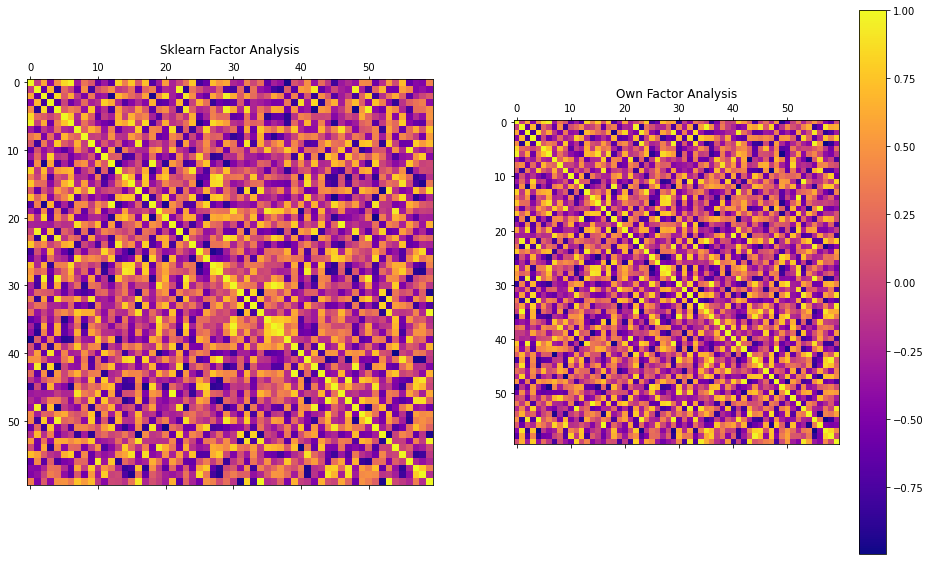

In [14]:
from sklearn.decomposition import FactorAnalysis

# sklearn's Version of Factor Analysis
fa = FactorAnalysis(nrHidden,
                    random_state=0,
                    noise_variance_init=Psi,
                    max_iter=100)
fa.fit(X - np.mean(X, axis=0))
X_transformed = fa.transform(X - np.mean(X, axis=0))

# Own Version
U_calc, Psi_calc, hidden_factor_means = factorAnalysis(X, nrHidden, it=100)

# Comparison
_, (ax_sk, ax_fa) = plt.subplots(1, 2, figsize=(16, 10))
ax_sk.matshow(np.corrcoef(U, fa.components_.T), cmap=plt.get_cmap('plasma'))
ax_sk.set_title('Sklearn Factor Analysis')

cbar = ax_fa.matshow(np.corrcoef(U, U_calc), cmap=plt.get_cmap('plasma'))
ax_fa.set_title('Own Factor Analysis')

plt.colorbar(cbar)
plt.show()

Estimation of $\psi$:

In [15]:
print("Psi's matching to one decimal place?")
print(np.allclose(fa.noise_variance_, Psi_calc, atol=0.1))
print("Psi's from sklearn matching to two decimal places compared to own Psi's?")
print(np.allclose(fa.noise_variance_, Psi_calc, atol=0.01))

Psi's matching to one decimal place?
True
Psi's from sklearn matching to two decimal places compared to own Psi's?
True


Estimation of $U$:

In [16]:
print(U - U_calc)

[[-0.34115487  1.11397186  1.40846529 -2.95182618  1.30350465]
 [ 0.57971395  2.1750171  -2.97330715  0.02976083 -0.34254693]
 [-0.43923419 -0.64605424  2.51572417 -1.58186897  1.16831566]
 [ 0.58194246  2.44760026 -4.40404571  1.93987045 -1.59727441]
 [-0.89346987 -1.30082264  1.99955319 -0.53651414  0.43657357]
 [-1.49639076  0.58590669  0.16791004 -1.94492819  0.54487024]
 [-0.09575489  0.4998019   0.84187754 -1.58611279  0.76473007]
 [ 0.50267591 -0.23898338  0.94983275 -0.34741522 -0.04639604]
 [-0.67929082  0.2228535  -0.89260407 -0.44836717 -0.29557161]
 [-0.65222516 -0.807439    1.89920998 -0.53857969 -0.03726953]
 [ 1.09501153 -0.7538237  -0.08674561  1.04169898 -0.31014383]
 [-0.41363659  0.53205657 -2.00551756  1.78194979 -1.05193409]
 [ 0.27515009 -0.05222607 -1.53462081  1.38924911 -0.91854995]
 [-1.25250847 -0.05891275  0.74701539 -1.00950141  0.61750557]
 [ 0.63996611 -0.21329844  1.9639169  -1.98692986  1.5872464 ]
 [-1.3193799  -0.73081584  1.15923427 -2.25755267  1.18

Difference: Actual U - Own U


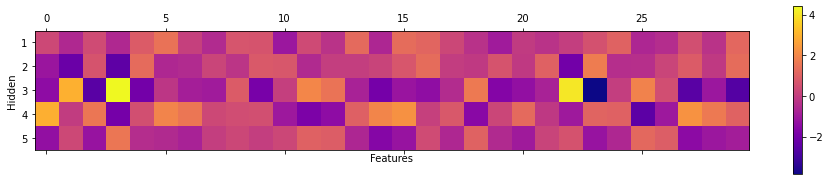

In [17]:
print('Difference: Actual U - Own U')

plt.figure(figsize=(16, 3))
# Transpose for better plotting
colors = plt.matshow((U_calc - U).T, cmap=plt.get_cmap('plasma'), fignum=1)
plt.yticks(range(0, 5), range(1, 6))
plt.ylabel('Hidden')
plt.xlabel('Features')
plt.colorbar(colors)
plt.show()

Difference: sklearn U - Own U


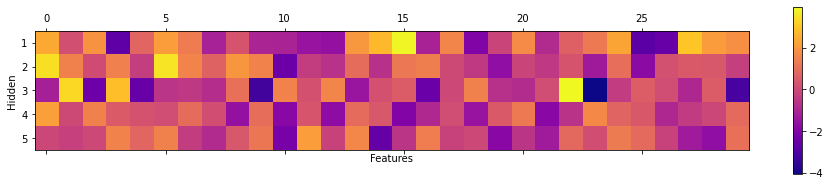

In [18]:
print('Difference: sklearn U - Own U')

plt.figure(figsize=(16, 3))
# Transpose for better plotting
colors = plt.matshow((U_calc - fa.components_.T).T,
                     cmap=plt.get_cmap('plasma'),
                     fignum=1)
plt.yticks(range(0, 5), range(1, 6))
plt.ylabel('Hidden')
plt.xlabel('Features')
plt.colorbar(colors)
plt.show()

Difference: Actual U - sklearn U


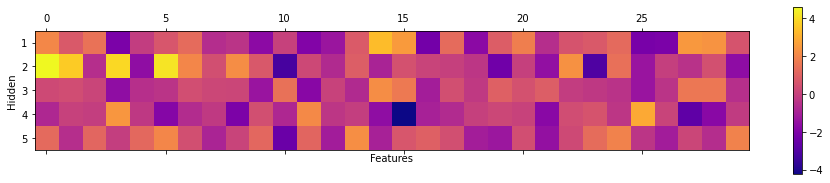

In [19]:
print('Difference: Actual U - sklearn U')

plt.figure(figsize=(16, 3))
# Transpose for better plotting
colors = plt.matshow((U - fa.components_.T).T,
                     cmap=plt.get_cmap('plasma'),
                     fignum=1)
plt.yticks(range(0, 5), range(1, 6))
plt.ylabel('Hidden')
plt.xlabel('Features')
plt.colorbar(colors)
plt.show()

# Exercise B: Theory

<h3 style="color:rgb(0,120,170)">Question 5.9 (10 Points):</h3>

Discuss how the mean (before centering) and the found maximum likelihood model parameters of the centered data (factor loading matrix and covariance matrix) will change, if the individual components of the data are scaled with some value (not the same value over the components).

<h3 style="color:rgb(208,90,80)">Answer 5.9:</h3>

In [20]:
def wildly_scale(X):
    X_scaled = X.copy()
    for i in range(X_scaled.shape[1]):
        X_scaled[:, i] = X_scaled[:, i] * np.random.uniform(0.1, 10)
    return X_scaled

U_a, Psi_a, hidden_factor_means_a = factorAnalysis(X, nrHidden, 100)
U_b, Psi_b, hidden_factor_means_b = factorAnalysis(wildly_scale(X), nrHidden, 100)

In [21]:
U_a - U_b

array([[-2.32525155e+01, -5.14229161e+00, -9.93876080e+00,
        -9.53800774e+00,  2.02126845e+00],
       [-1.10138440e-01, -7.30174968e+00,  1.04018864e+00,
        -6.28642601e+00,  3.72802666e+00],
       [-2.88422763e+00,  1.78324859e+00,  5.14817085e-01,
         1.80938818e+00, -8.91962662e-01],
       [-1.63719612e+00, -9.17413666e+00, -3.15412065e-01,
        -1.95649184e+00,  1.16233826e+01],
       [-8.48887026e-01,  2.78904833e+00, -6.45849412e-01,
         4.66918859e+00, -2.91042665e+00],
       [-9.70442706e+00, -1.37485911e+01, -1.32368800e+01,
        -1.35989763e+00, -4.47264791e+00],
       [-5.13864606e+00, -8.94143477e-01, -1.55400443e+00,
        -2.94733613e+00,  1.09849515e-01],
       [-7.93951661e-01,  2.40462057e+00, -3.65635782e-01,
        -1.61214489e-01,  2.50412965e-01],
       [ 6.77158219e+00, -8.15682693e+00, -1.27940875e+01,
        -4.39834280e+00, -2.96919535e+00],
       [-5.46759987e+00,  5.93316091e+00, -5.73550391e+00,
         7.45275705e+00

In [22]:
Psi_a - Psi_b

array([-111.73555665,  -23.96851751,   -7.27796181,  -40.56987566,
        -19.02730155, -162.98417615,  -28.28983732,   -0.47028631,
       -244.65389253,  -31.25377505,  -99.89708559,  -20.66976322,
       -203.23629709,  -10.19003828,  -84.17771951, -258.24546311,
       -159.39380646,   -6.93119444, -178.95716261,   -4.15312383,
        -58.95627255,  -13.82467863,    1.77101304,    2.64730737,
        -70.34934525,  -82.8382691 ,  -56.00622739,  -31.79700342,
        -20.06853726, -141.65648973])

<h3 style="color:rgb(0,120,170)">Question 5.10 (10 Points):</h3>

Assume a rotation of the factors with rotation matrix $\mathbf{R}$, obeying $\mathbf{R}^T\mathbf{R} = \mathbf{I}$. Derive an expression for the noise covariance matrix $\mathbf{\Psi}$ (only in terms of $\mathbf{U}_{rot}$, the data $\mathbf{X}$, the number of samples $n$, and basic matrix and arithmetic operations), if rotated factors $\mathbf{y}_{rot} \; = \;  \mathbf{R}\ \mathbf{y}$ instead of $\mathbf{y}$ are assumed and the factor loading matrix changes accordingly ($\mathbf{U} \; = \;  \mathbf{U}_{rot} \mathbf{R}$).

Hint: Consider slide 6 of the exercise notes.


<h3 style="color:rgb(208,90,80)">Answer 5.10:</h3>

see [Properties of a rotation matrix](https://en.wikipedia.org/wiki/Rotation_matrix#Properties_of_a_rotation_matrix)

\begin{align*}
\frac{1}{n} X^T X &= \frac{1}{n} \big(Y_{rot} U^T + \Upsilon \big)^T \big(Y_{rot} U^T + \Upsilon) \\
&= U \frac{1}{n} Y_{rot}^T Y_{rot} U^T + \frac{1}{n} U Y_{rot}^T \Upsilon + \frac{1}{n} \Upsilon^T Y_{rot} U^T + \underbrace{\frac{1}{n} \Upsilon^T \Upsilon}_{\psi} \\
\psi &= \frac{1}{n} X^T X - U \frac{1}{n} \underbrace{Y_{rot}^T}_{R Y^T} \underbrace{Y_{rot}}_{Y R^T} U^T - \frac{1}{n} U \underbrace{Y_{rot}^T}_{R Y^T} \Upsilon - \frac{1}{n} \Upsilon^T \underbrace{Y_{rot}}_{Y R^T} U^T \\
&= \frac{1}{n} X^T X - U R \underbrace{\frac{1}{n} Y^T Y}_{1} R^T U^T - \frac{1}{n} U R \underbrace{Y^T \Upsilon}_{0} - \frac{1}{n} \underbrace{\Upsilon^T Y}_{0} R^T U^T \\
&= \frac{1}{n} X^T X - \underbrace{U}_{U_{rot} R} R R^T U^T \\
&= \frac{1}{n} X^T X - U_{rot} R R R^T \underbrace{U^T}_{R^T U_{rot}^T} \\
&= \frac{1}{n} X^T X - U_{rot} R R \underbrace{R^T R^T}_{\text{for any Rotation matrix $R$: $R^T = R^{-1}$}}  U_{rot}^T \\
&= \frac{1}{n} X^T X - U_{rot} R \underbrace{R R^{-1}}_{I} R^{-1} U_{rot}^T \\
&= \frac{1}{n} X^T X - U_{rot} \underbrace{R R^{-1}}_{I}  U_{rot}^T \\
&= \frac{1}{n} X^T X - U_{rot} U_{rot}^T \\
\end{align*}